In [3]:
# 변수의 shape, type, value 확인
def p(var,_name="") :
    if _name != "" : print(f'<<{_name}>>')
    if type(var)!=type([]):
        try:
            print(f'Shape:{var.shape}')
        except :
            pass
    print(f'Type: {type(var)}')
    print(f'Values: {var}')

def pst(_x,_name=""):
    print(f'<<{_name}>> Shape{_x.shape}, {type(_x)}')
def ps(_x,_name=""):
    print(f'<<{_name}>> Shape{_x.shape}')

In [4]:
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras import layers, models


import numpy as np
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = [5, 3.5]
plt.rcParams["font.size"] = "8"

tf.__version__,keras.__version__
#('2.17.0', '3.4.1')

('2.18.0', '3.8.0')

In [5]:
import matplotlib.pyplot as plt

def plot_history_with_earlystop(history, early_stop_epoch=None):
    """
    history: model.fit(...)의 반환값
    early_stop_epoch: EarlyStopping이 작동한 시점 (epoch 기준, 0부터 시작)
    """

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history.get('accuracy') or history.history.get('acc')
    val_acc = history.history.get('val_accuracy') or history.history.get('val_acc')

    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(12, 5))

    # 📉 Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'b-', label='Train Loss')
    plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
    if early_stop_epoch is not None:
        plt.axvline(x=early_stop_epoch + 1, color='gray', linestyle=':', label='Early Stop')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs. Validation Loss')
    plt.grid(True)
    plt.legend()

    # 📈 Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'g-', label='Train Accuracy')
    plt.plot(epochs, val_acc, 'orange', linestyle='--', label='Validation Accuracy')
    if early_stop_epoch is not None:
        plt.axvline(x=early_stop_epoch + 1, color='gray', linestyle=':', label='Early Stop')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs. Validation Accuracy')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# MLP, CNN Parameter 비교

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
<<x_train>> Shape(60000, 28, 28)


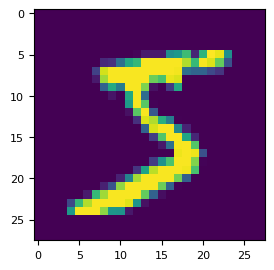

In [6]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# x_train = x_train/255.
# x_test = x_test/255.

ps(x_train,'x_train')

plt.figure(figsize=(3,3))
plt.imshow(x_train[0, :, :])
plt.show()

In [7]:
ps(x_train,'x_train')
x_train = x_train[...,None]
# x_train = x_train[...,tf.newaxis]
# x_train = tf.expand_dims(x_train, axis=-1)
x_test = x_test[...,None]
ps(x_train,'x_train')
ps(y_train,'y_train')

<<x_train>> Shape(60000, 28, 28)
<<x_train>> Shape(60000, 28, 28, 1)
<<y_train>> Shape(60000,)


## MLP Model

In [8]:
## Sequential model 사용
model = keras.models.Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=384, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 384)            │       301,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         3,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,290 (1.16 MB)

 Trainable params: 305,290 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.fit(x_train, y_train, epochs=3, batch_size=128, validation_data=(x_test,y_test))

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.8464 - loss: 10.3425 - val_acc: 0.9405 - val_loss: 1.0066
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9522 - loss: 0.6198 - val_acc: 0.9462 - val_loss: 0.6237
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9648 - loss: 0.2909 - val_acc: 0.9537 - val_loss: 0.4897


## CNN Model

In [10]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(keras.layers.Conv2D(32,3,strides=3,activation='relu'))
model.add(keras.layers.Flatten(name='flatten'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 9, 9, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2592)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        25,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,250 (102.54 KB)

 Trainable params: 26,250 (102.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
history = model.fit(x_train, y_train, epochs=3, batch_size=128, validation_data=(x_test,y_test))

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - acc: 0.7899 - loss: 2.5504 - val_acc: 0.9469 - val_loss: 0.2263
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9548 - loss: 0.1690 - val_acc: 0.9586 - val_loss: 0.1607
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9668 - loss: 0.1130 - val_acc: 0.9626 - val_loss: 0.1436


## Stride로 해상도 조절

In [12]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(keras.layers.Conv2D(32,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
#  model.add(keras.layers.MaxPool2D()),
model.add(keras.layers.Conv2D(32,3,strides=2,padding='same',activation='relu'))
model.add(keras.layers.Conv2D(32,3,strides=2,padding='valid',activation='relu'))
model.add(keras.layers.Flatten(name='flatten'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,890 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,706 (84.79 KB)

 Trainable params: 21,706 (84.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - acc: 0.7562 - loss: 1.6028 - val_acc: 0.9650 - val_loss: 0.1178
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9661 - loss: 0.1106 - val_acc: 0.9750 - val_loss: 0.0823
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9800 - loss: 0.0681 - val_acc: 0.9803 - val_loss: 0.0661


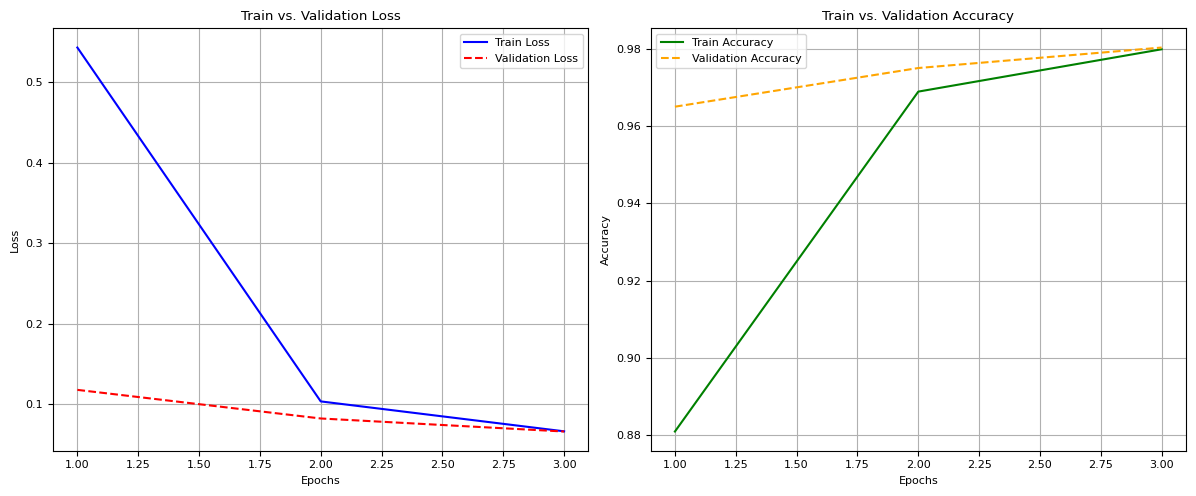

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
history = model.fit(x_train, y_train, epochs=3, batch_size=128, validation_data=(x_test,y_test))

plot_history_with_earlystop(history, early_stop_epoch=None)

## MNIST 99% 넘기기

In [14]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(keras.layers.Flatten(name='flatten'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,962 (1.14 MB)

 Trainable params: 297,962 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - acc: 0.7593 - loss: 1.1821 - val_acc: 0.9834 - val_loss: 0.0490
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9857 - loss: 0.0439 - val_acc: 0.9910 - val_loss: 0.0273
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9903 - loss: 0.0303 - val_acc: 0.9876 - val_loss: 0.0362


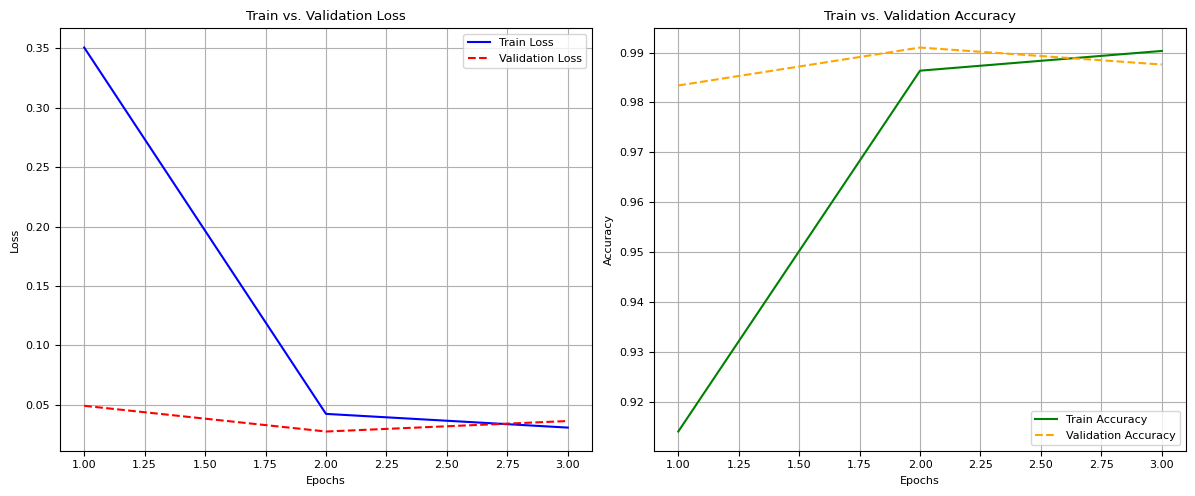

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
history = model.fit(x_train, y_train, epochs=3, batch_size=128, validation_data=(x_test,y_test))

plot_history_with_earlystop(history, early_stop_epoch=None)

# 실습과제 1  
## MNIST 99% 넘기기에서 사용된 모델을 Functional API로 수정하여 학습시켜 보자    

In [16]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(keras.layers.Flatten(name='flatten'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,962 (1.14 MB)

 Trainable params: 297,962 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,962 (1.14 MB)

 Trainable params: 297,962 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.7986 - loss: 0.9584 - val_acc: 0.9820 - val_loss: 0.0567
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9866 - loss: 0.0429 - val_acc: 0.9871 - val_loss: 0.0451
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9919 - loss: 0.0277 - val_acc: 0.9904 - val_loss: 0.0284
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9928 - loss: 0.0225 - val_acc: 0.9885 - val_loss: 0.0331
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9946 - loss: 0.0180 - val_acc: 0.9890 - val_loss: 0.0316
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9950 - loss: 0.0146 - val_acc: 0.9873 - val_loss: 0.0402
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9944 - loss: 0.0172 - val_acc: 0.9921 - val_loss: 0.0285
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9961 - loss: 0.0116 - val_acc: 0.9893 - val_loss: 0.0376
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - ac

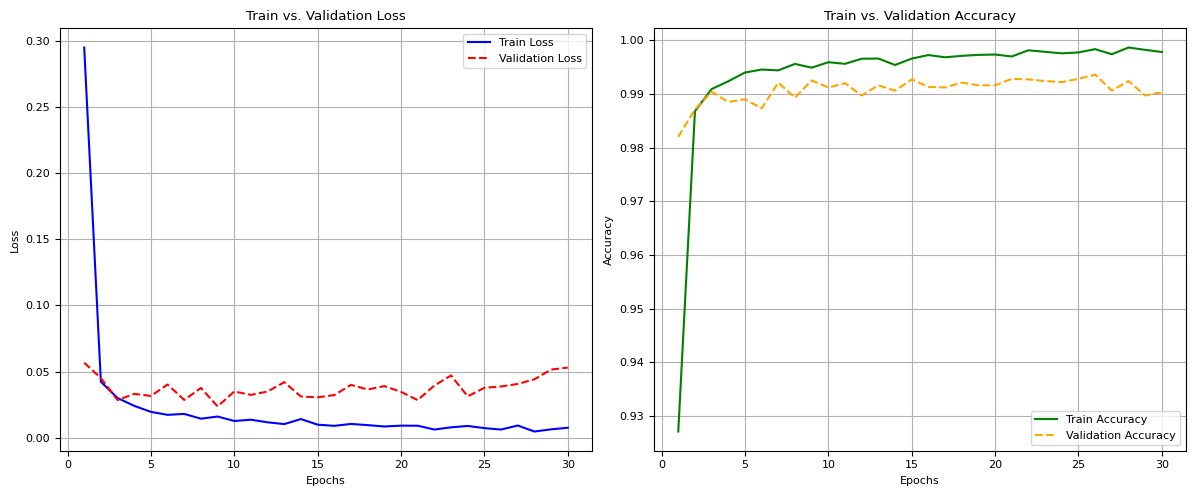

In [17]:
# Functional API
from tensorflow.keras import layers, models

# 입력 레이어
inputs = keras.Input(shape=(28, 28, 1))

# 블록 1
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# 블록 2
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# 블록 3
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# 분류기
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

# 모델 정의
model_func = models.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_test,y_test))

plot_history_with_earlystop(history, early_stop_epoch=None)

# 실습과제 2  
## 앞에서 수정한 모델을 수정하여 성능을 높여보자(목표:99.6%이상)  
### *모델 키우기  
#### 1)Layer당 node늘리기  
#### 2)Layer 추가하기  
### *학습속도 높이기 / 낮추기  
#### 1) BatchNorm layer 추가하여 학습속도 높이기  
#### 2) Dropout layer 추가하여 학습속도 낮추기  
### *변동성 줄이기  
#### 1)Learning rate 낮추기  
#### 2)Batch size 늘리기



(참고사항)  
1. Overffiting이 발생하도록 모델을 키울것
  - Training acc가 최대가 1/2 epoch에서 최고가 되고, overfitting이 발생하는게 좋음
  - 모델을 키우고, BN을 사용하여 학습 속돌를     
2. Dropout, lr, batch size등을 조정하여 학습속도 감소, 변동성 감소 필요  

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 7,191,648 (27.43 MB)

 Trainable params: 2,396,106 (9.14 MB)

 Non-trainable params: 3,328 (13.00 KB)

 Optimizer params: 4,792,214 (18.28 MB)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - acc: 0.9901 - loss: 0.0359 - val_acc: 0.9861 - val_loss: 0.0507
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 0.9926 - loss: 0.0264 - val_acc: 0.9925 - val_loss: 0.0271
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 0.9935 - loss: 0.0198 - val_acc: 0.9922 - val_loss: 0.0282
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 0.9953 - loss: 0.0164 - val_acc: 0.9904 - val_loss: 0.0379
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 0.9949 - loss: 0.0163 - val_acc: 0.9937 - val_loss: 0.0259
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 0.9957 - loss: 0.0138 - val_acc: 0.9946 - val_loss: 0.0203
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 0.9966 - loss: 0.0122 - val_acc: 0.9941 - val_loss: 0.0211
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 0.9972 - loss: 0.0091 - val_acc: 0.9896 - val_loss: 0.0437
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms

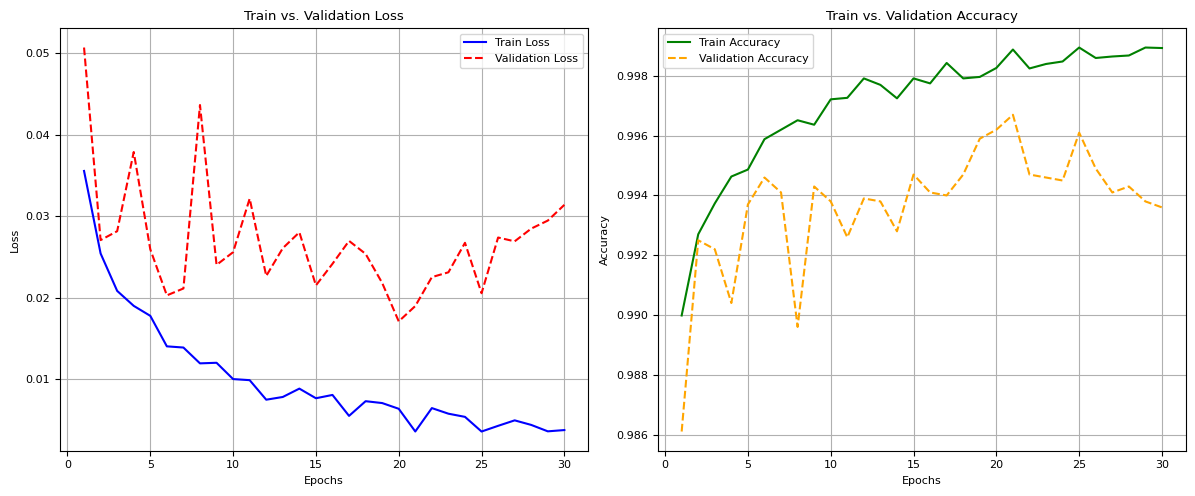

In [20]:
# Functional API + Batch Normalize + Dropout
from tensorflow.keras import layers, models

# 입력 레이어
inputs = keras.Input(shape=(28, 28, 1))

# 블록 1
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 블록 2
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 블록 3
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 분류기
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

# 모델 정의
model_func = models.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_test,y_test))

plot_history_with_earlystop(history, early_stop_epoch=None)

Model: "functional_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,399,434 (9.15 MB)

 Trainable params: 2,396,106 (9.14 MB)

 Non-trainable params: 3,328 (13.00 KB)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - acc: 0.8142 - loss: 0.6389 - val_acc: 0.9846 - val_loss: 0.0549
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 0.9817 - loss: 0.0613 - val_acc: 0.9879 - val_loss: 0.0397
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 0.9879 - loss: 0.0408 - val_acc: 0.9898 - val_loss: 0.0327
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 0.9904 - loss: 0.0316 - val_acc: 0.9927 - val_loss: 0.0241
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 0.9911 - loss: 0.0286 - val_acc: 0.9892 - val_loss: 0.0384
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 0.9917 - loss: 0.0275 - val_acc: 0.9909 - val_loss: 0.0330
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 0.9920 - loss: 0.0269 - val_acc: 0.9926 - val_loss: 0.0249
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 0.9937 - loss: 0.0222 - val_acc: 0.9922 - val_loss: 0.0305
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms

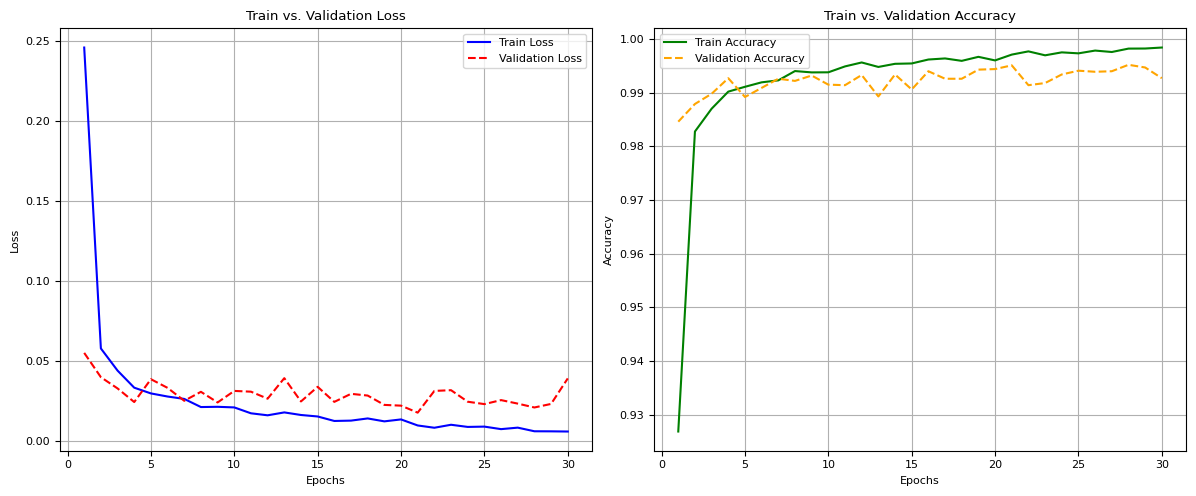

In [22]:
# Layer 당 node 2배 + Layer 추가
from tensorflow.keras import layers, models

# 입력 레이어
inputs = keras.Input(shape=(28, 28, 1))

# 블록 1
x = layers.Conv2D(64, 3, padding='same', activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 블록 2
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 블록 3
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 블록 4
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 분류기
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

# 모델 정의
model = models.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_test,y_test))


plot_history_with_earlystop(history, early_stop_epoch=None)

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,399,434 (9.15 MB)

 Trainable params: 2,396,106 (9.14 MB)

 Non-trainable params: 3,328 (13.00 KB)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - acc: 0.7775 - loss: 0.7612 - val_acc: 0.9771 - val_loss: 0.0732
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - acc: 0.9808 - loss: 0.0636 - val_acc: 0.9846 - val_loss: 0.0547
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - acc: 0.9875 - loss: 0.0394 - val_acc: 0.9898 - val_loss: 0.0402
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - acc: 0.9901 - loss: 0.0317 - val_acc: 0.9923 - val_loss: 0.0285
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - acc: 0.9913 - loss: 0.0280 - val_acc: 0.9940 - val_loss: 0.0220
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - acc: 0.9933 - loss: 0.0212 - val_acc: 0.9901 - val_loss: 0.0380
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - acc: 0.9934 - loss: 0.0218 - val_acc: 0.9906 - val_loss: 0.0331
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - acc: 0.9940 - loss: 0.0199 - val_acc: 0.9931 - val_loss: 0.0237
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms

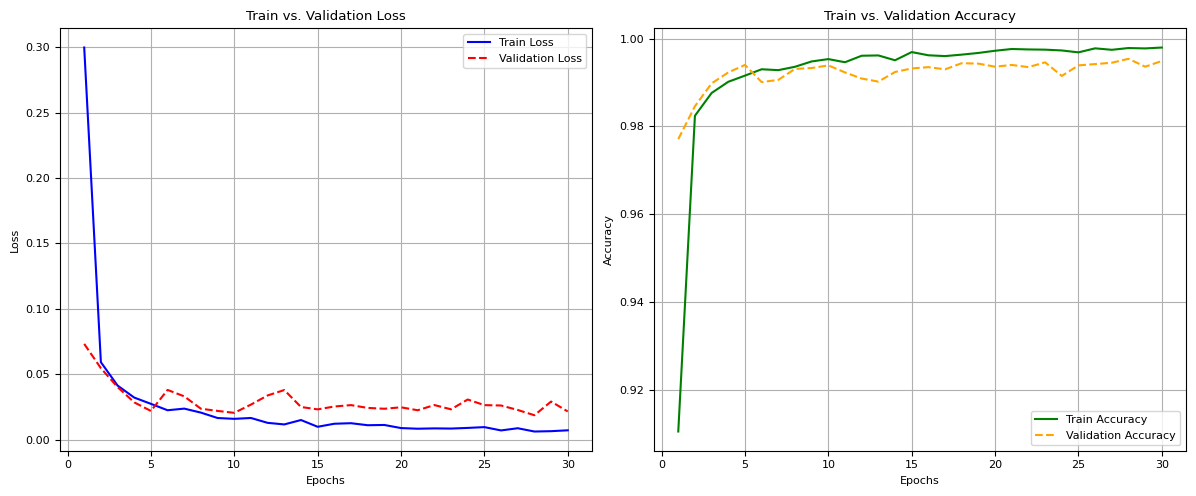

In [23]:
# Layer 당 node 2배 + Layer 추가 + Batchsize 늘리기
from tensorflow.keras import layers, models

# 입력 레이어
inputs = keras.Input(shape=(28, 28, 1))

# 블록 1
x = layers.Conv2D(64, 3, padding='same', activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 블록 2
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 블록 3
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 블록 4
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 분류기
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

# 모델 정의
model = models.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model.fit(x_train, y_train, epochs=30, batch_size=256, validation_data=(x_test,y_test))


plot_history_with_earlystop(history, early_stop_epoch=None)

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 7,191,648 (27.43 MB)

 Trainable params: 2,396,106 (9.14 MB)

 Non-trainable params: 3,328 (13.00 KB)

 Optimizer params: 4,792,214 (18.28 MB)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - acc: 0.9972 - loss: 0.0098 - val_acc: 0.9922 - val_loss: 0.0298
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - acc: 0.9973 - loss: 0.0093 - val_acc: 0.9932 - val_loss: 0.0286
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - acc: 0.9979 - loss: 0.0077 - val_acc: 0.9943 - val_loss: 0.0283
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - acc: 0.9976 - loss: 0.0078 - val_acc: 0.9915 - val_loss: 0.0351
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - acc: 0.9978 - loss: 0.0072 - val_acc: 0.9944 - val_loss: 0.0250
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - acc: 0.9986 - loss: 0.0053 - val_acc: 0.9930 - val_loss: 0.0325
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - acc: 0.9985 - loss: 0.0047 - val_acc: 0.9910 - val_loss: 0.0364
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - acc: 0.9983 - loss: 0.0055 - val_acc: 0.9930 - val_loss: 0.0245
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms

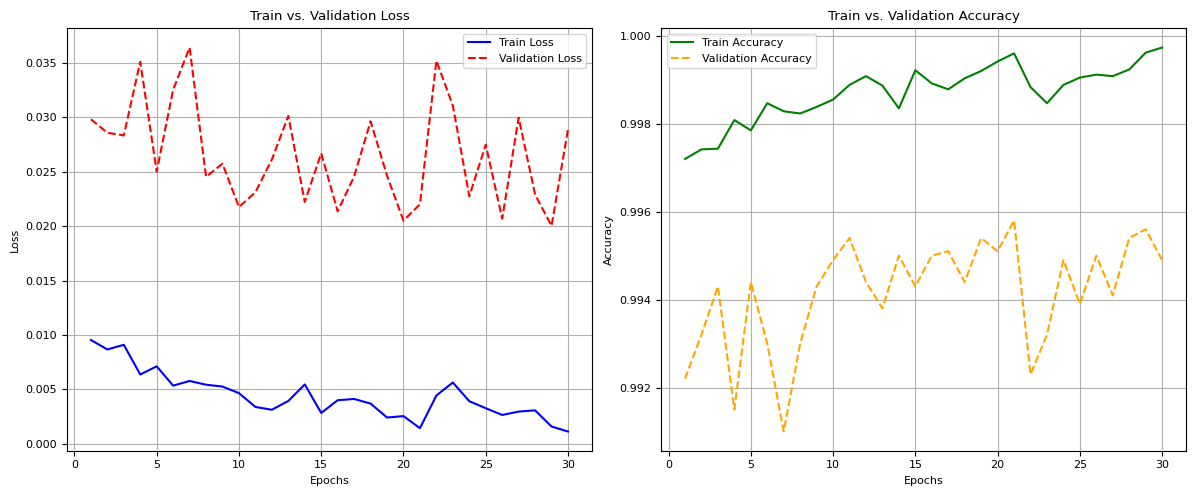

In [24]:
# Functional API + Batch Normalize + Dropout + 모델 다시 축소 및 Batch 증가
from tensorflow.keras import layers, models

# 입력 레이어
inputs = keras.Input(shape=(28, 28, 1))

# 블록 1
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 블록 2
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 블록 3
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 분류기
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

# 모델 정의
model_func = models.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
history = model.fit(x_train, y_train, epochs=30, batch_size=256, validation_data=(x_test,y_test))

plot_history_with_earlystop(history, early_stop_epoch=None)

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 7,191,648 (27.43 MB)

 Trainable params: 2,396,106 (9.14 MB)

 Non-trainable params: 3,328 (13.00 KB)

 Optimizer params: 4,792,214 (18.28 MB)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - acc: 0.9997 - loss: 0.0011 - val_acc: 0.9957 - val_loss: 0.0241
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 0.9999 - loss: 6.7191e-04 - val_acc: 0.9957 - val_loss: 0.0236
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 1.0000 - loss: 1.4507e-04 - val_acc: 0.9960 - val_loss: 0.0217
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 0.9999 - loss: 2.9171e-04 - val_acc: 0.9957 - val_loss: 0.0229
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 1.0000 - loss: 1.3973e-04 - val_acc: 0.9960 - val_loss: 0.0227
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 1.0000 - loss: 1.2460e-04 - val_acc: 0.9960 - val_loss: 0.0225
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 1.0000 - loss: 1.3398e-04 - val_acc: 0.9960 - val_loss: 0.0225
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 1.0000 - loss: 1.0270e-04 - val_acc: 0.9960 - val_loss: 0.0227
Epoch 9/30
469/469 

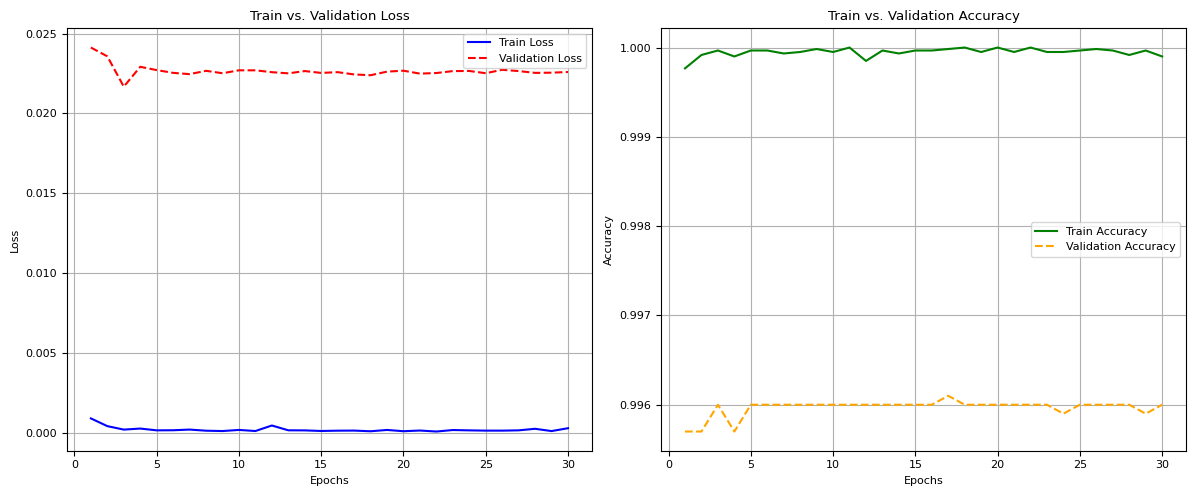

In [25]:
# Functional API + Batch Normalize + Dropout + Cosine Decay Learning scheduler
from tensorflow.keras import layers, models

# 입력 레이어
inputs = keras.Input(shape=(28, 28, 1))

# 블록 1
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 블록 2
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 블록 3
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 분류기
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

# 모델 정의
model_func = models.Model(inputs=inputs, outputs=outputs)
model.summary()


initial_learning_rate = 0.0
decay_steps = 60*50
alpha=0.0
warmup_target = 0.001
warmup_steps = 60*2

CosineDecay_lr = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate, decay_steps, warmup_target=warmup_target,
    warmup_steps=warmup_steps )

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=CosineDecay_lr),
              metrics=['acc'])

history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_test,y_test))

plot_history_with_earlystop(history, early_stop_epoch=None)

Model: "functional_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_73          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_74          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_75          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_76          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_77          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_78          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_79          │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,399,434 (9.15 MB)

 Trainable params: 2,396,106 (9.14 MB)

 Non-trainable params: 3,328 (13.00 KB)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - acc: 0.5497 - loss: 1.6162 - val_acc: 0.9418 - val_loss: 0.3528
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - acc: 0.9798 - loss: 0.0684 - val_acc: 0.9827 - val_loss: 0.0764
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - acc: 0.9892 - loss: 0.0367 - val_acc: 0.9929 - val_loss: 0.0255
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - acc: 0.9925 - loss: 0.0250 - val_acc: 0.9929 - val_loss: 0.0246
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - acc: 0.9942 - loss: 0.0191 - val_acc: 0.9906 - val_loss: 0.0293
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - acc: 0.9961 - loss: 0.0130 - val_acc: 0.9945 - val_loss: 0.0196
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - acc: 0.9971 - loss: 0.0087 - val_acc: 0.9955 - val_loss: 0.0170
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - acc: 0.9982 - loss: 0.0059 - val_acc: 0.9954 - val_loss: 0.0147
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms

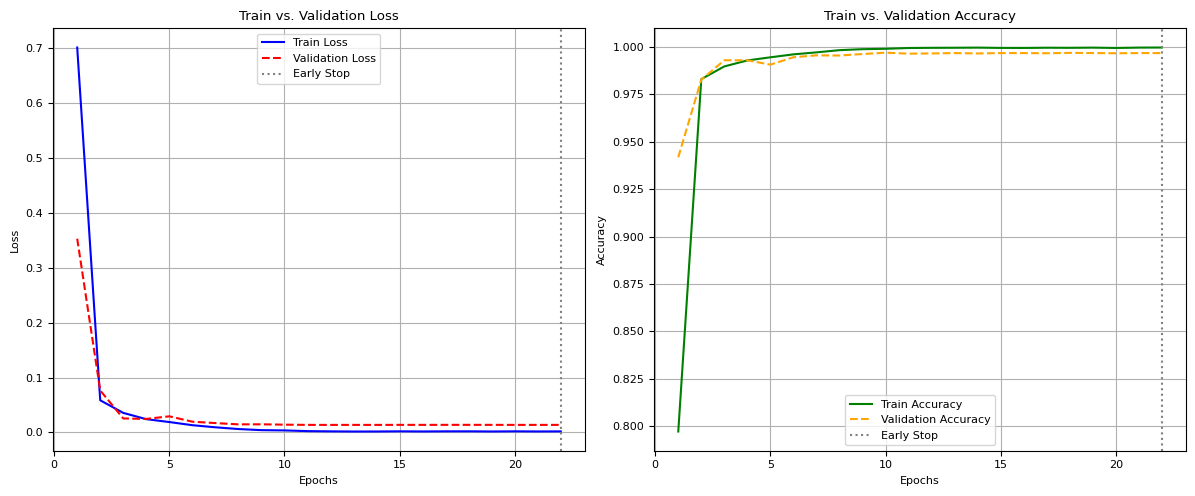

In [28]:
# Layer 당 node 2배 + Layer 추가 + Batchsize 늘리기 +  + Cosine Decay Learning scheduler
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# 입력 레이어
inputs = keras.Input(shape=(28, 28, 1))

# 블록 1
x = layers.Conv2D(64, 3, padding='same', activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 블록 2
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 블록 3
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 블록 4
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# 분류기
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

# 모델 정의
model = models.Model(inputs=inputs, outputs=outputs)
model.summary()

initial_learning_rate = 0.0
decay_steps = 60*50
alpha=0.0
warmup_target = 0.001
warmup_steps = 60*2

CosineDecay_lr = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate, decay_steps, warmup_target=warmup_target,
    warmup_steps=warmup_steps )

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=CosineDecay_lr),
              metrics=['acc'])

# EarlyStopping 콜백 생성
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# 학습
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=256,
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)

# 시각화
early_epoch = len(history.history['loss']) - 1
plot_history_with_earlystop(history, early_stop_epoch=early_epoch)